<a href="https://colab.research.google.com/github/rjanow/Masterarbeit/blob/main/netCDF4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script um die netCDF4 Vorhersagewerte in einen Dataframe abzuspeichern

In [19]:
!pip install netCDF4

In [20]:
from google.colab import drive

# Mounten Sie Ihr Google Drive-Konto
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Import der benötigten Module
import os
import netCDF4 as nc
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [42]:
# coordinates of the location
latitude = 50.7
longitude = 7.2
# time is given in hours from 1.1.1900 00:00
origin = datetime.datetime(1900, 1, 1, 0, 0, 0, 0)
# Monat der Vorhersage
dateiname = 'CSV_Cams'

In [23]:
# Dateipfad der Vorhersagewerte in der Google-Drive
dateipfad_in_google_drive = '/content/drive/My Drive/Colab_Notebooks/netCDF4_Wetterdaten/levtype_sfc.nc'

In [24]:
# Import der Vorhersagewerte
cams_netcdf = nc.Dataset(dateipfad_in_google_drive, 'r')

In [25]:
# Zuordnen der Variabeln zu entsprechenden NP-Arrays
# fehlende Werte werden durch NaN Werte ersetzt, das mehrdimensionale Array wird zu einem eindimensonalen formatiert
latitudes = cams_netcdf.variables['latitude'][0]
longitudes = cams_netcdf.variables['longitude'][0]
time = cams_netcdf.variables['time'][:].filled(np.nan)
aod469 = cams_netcdf.variables['aod469'][:].filled(np.nan).reshape(-2)
aod550 = cams_netcdf.variables['aod550'][:].filled(np.nan).reshape(-2)
aod670 = cams_netcdf.variables['aod670'][:].filled(np.nan).reshape(-2)
aod865 = cams_netcdf.variables['aod865'][:].filled(np.nan).reshape(-2)
gtco3 = cams_netcdf.variables['gtco3'][:].filled(np.nan).reshape(-2)
uvbed = cams_netcdf.variables['uvbed'][:].filled(np.nan).reshape(-2)
uvbedcs = cams_netcdf.variables['uvbedcs'][:].filled(np.nan).reshape(-2)

In [26]:
# richtige Datetime berechen
datetime = np.array([origin + datetime.timedelta(hours=int(i)) for i in time])

In [27]:
# Zuorden der NP-Arrays in einen Dataframe
df_cams = pd.DataFrame({'time': datetime, 'aod469': aod469, 'aod550': aod550,'aod670': aod670,'aod865': aod865,'aod865': gtco3,'uvbed': uvbed,'uvbedcs': uvbedcs,})

In [28]:
# Index des DF setzen
df_cams.set_index('time', inplace=True)

In [31]:
# Resampling der Zeitreihe auf 2 Min. und interpolation der fehlenden Messwerte
df_cams_resampled = df_cams.resample('2T')
df_cams_interpolated = df_cams_resampled.interpolate(method='polynomial', order = 1)

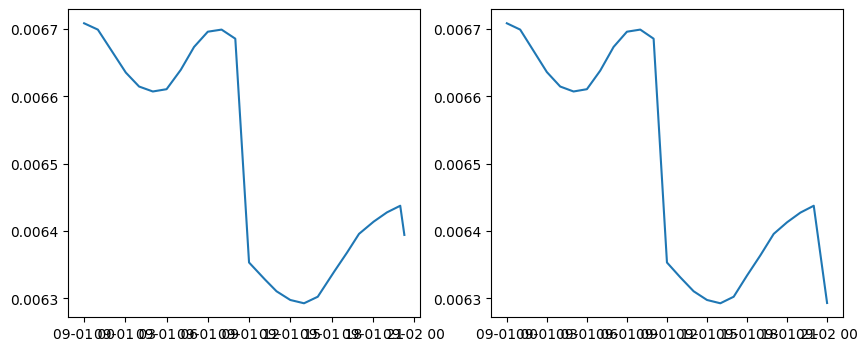

In [32]:
# Plotten eines Tages mit 2 Min. Auflösung und mit 1 Std. Auflösung
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(df_cams_interpolated['aod865'][0:700])
axes[1].plot(df_cams['aod865'][0:25])

In [43]:
def save_dataframe_to_drive(dataframe, folder_path, filename):

    # Erstelle den vollen Pfad zur Datei
    full_path = os.path.join(folder_path, filename)

    # Speichere den DataFrame als CSV-Datei auf Google Drive
    dataframe.to_csv(full_path, index=False)

    print(f'Der DataFrame wurde als {filename} in {folder_path} auf Google Drive gespeichert.')

In [44]:
# Abspeichern des konvertierten DF als CSV
save_dataframe_to_drive(df_cams_interpolated, '/content/drive/My Drive/Colab_Notebooks/CSV_Vorhersage', dateiname)

Der DataFrame wurde als CSV_Cams in /content/drive/My Drive/Colab_Notebooks/CSV_Vorhersage auf Google Drive gespeichert.
